# Data Visualization

## Preliminaries

Import Dependencies

In [2]:
import pandas as pd
import geopandas as gpd
import pyproj
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import time
import matplotlib.animation as animation

Set Province

In [3]:
province = "Catanduanes"

Load Results

In [4]:
file = f'../04_results/{province}/01_spatiotemporal/{province}_results.csv'

results = pd.read_csv(file, index_col="Unnamed: 0")

results.head()

,PSGC,Municipality,idarea,Date,n,exp,base,typeI,typeII,typeIII,typeIV
1,502001000,Bagamanoc,1,2021-01-01,0,2.457164,0.231385,0.145892,0.059588,0.231241,0.231346
2,502001000,Bagamanoc,1,2021-01-02,0,2.457164,0.222170,0.142024,0.056763,0.222042,0.221991
3,502001000,Bagamanoc,1,2021-01-03,0,2.457164,0.204557,0.134770,0.046784,0.204462,0.204377
4,502001000,Bagamanoc,1,2021-01-04,0,2.457164,0.191733,0.128849,0.040371,0.191646,0.191609
5,502001000,Bagamanoc,1,2021-01-05,0,2.457164,0.181555,0.123715,0.045876,0.181486,0.181473


## Plot All Results as Line Graph

In [5]:
df_results = results[['PSGC', 'Municipality', 'Date', 'typeII', 'n']]

df_results['Date'] = pd.to_datetime(df_results['Date'])

df_results.head()

C:\Users\diana\AppData\Local\Temp\ipykernel_6776\4216230367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Date'] = pd.to_datetime(df_results['Date'])


,PSGC,Municipality,Date,typeII,n
1,502001000,Bagamanoc,2021-01-01,0.059588,0
2,502001000,Bagamanoc,2021-01-02,0.056763,0
3,502001000,Bagamanoc,2021-01-03,0.046784,0
4,502001000,Bagamanoc,2021-01-04,0.040371,0
5,502001000,Bagamanoc,2021-01-05,0.045876,0


In [ ]:
def plot_rr_line_graph(model_type):
    # get list of municiaplity psgc
    mun_codes = df_results['PSGC'].unique().tolist()

    # plot formatting
    plt.figure(figsize=(120,20))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.margins(0,0)


    # add RR thresholds
    plt.axhline(y=1, color='y', linestyle='--', linewidth=10)
    plt.axhline(y=2, color='m', linestyle='--', linewidth=10)
    plt.axhline(y=3, color='r', linestyle='--', linewidth=10)

    # set colors for lines
    n = len(mun_codes)

    #### CHANGE THE COLORMAP DEPENDING ON THE NUMBER OF MUNICIPALITIES ###
    colors = plt.cm.tab20(np.linspace(0,1,n)).tolist()

    # plot each rr for each municiaplity as a line
    for code in mun_codes:
        df = df_results[df_results['PSGC'] == code]
        mun = df.iloc[0]['Municipality']

        plt.plot(df['Date'], df[model_type], linestyle='-', linewidth=7, label=mun, color=colors.pop())

    # set font size of axes
    plt.rcParams.update({'font.size': 10})

    # add legend
    leg = plt.legend(loc='upper left', prop={'size': 10})

    for legobj in leg.legendHandles:
        legobj.set_linewidth(15.0)

    # show grid in figure
    plt.grid()

    # save figure as png
    plt.savefig(f'00_output/{province}/{province}_{model_type}_rr_line_graph.png')

    plt.show()

In [7]:
df_results.dtypes

PSGC                     int64
Municipality            object
Date            datetime64[ns]
typeII                 float64
n                        int64
dtype: object

In [ ]:
def plot_rr_line_graph(model_type, start_date, end_date):
    # get list of municiaplity psgc
    mun_codes = df_results['PSGC'].unique().tolist()

    # get subset of dates
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)

    df_filtered = df_results[df_results['Date'] < end]
    df_filtered = df_filtered[df_filtered['Date'] > start]

    # plot formatting
    plt.figure(figsize=(40,20))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.margins(0,0)

    # add RR thresholds
    plt.axhline(y=1, color='y', linestyle='--', linewidth=5)
    plt.axhline(y=2, color='m', linestyle='--', linewidth=5)
    plt.axhline(y=3, color='r', linestyle='--', linewidth=5)
    plt.axhline(y=10, color='r', linestyle='--', linewidth=0.1)

    # set colors for lines
    n = len(mun_codes)

    #### CHANGE THE COLORMAP DEPENDING ON THE NUMBER OF MUNICIPALITIES ###
    colors = plt.cm.tab20(np.linspace(0,1,n)).tolist()

    # plot each rr for each municiaplity as a line
    for code in mun_codes:
        df = df_filtered[df_filtered['PSGC'] == code]
        mun = df.iloc[0]['Municipality']

        plt.plot(df['Date'], df[model_type], linestyle='-', linewidth=5, label=mun, color=colors.pop())

    # set font size of axes
    plt.rcParams.update({'font.size': 25})

    # add legend
    leg = plt.legend(loc='upper left', prop={'size': 20})

    for legobj in leg.legendHandles:
        legobj.set_linewidth(15.0)

    # show grid in figure
    plt.grid()

    # save figure as png
    plt.savefig(f'00_output/{province}/{province}_{model_type}_{start_date}_{end_date}_rr_line_graph.png')

    plt.show()

C:\Users\diana\AppData\Local\Temp\ipykernel_6776\502576987.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


OSError: [Errno 22] Invalid argument: '00_output/Catanduanes/Catanduanes_typeII_2021-03-01 00:00:00_2021-03-31 00:00:00_rr_line_graph.png'

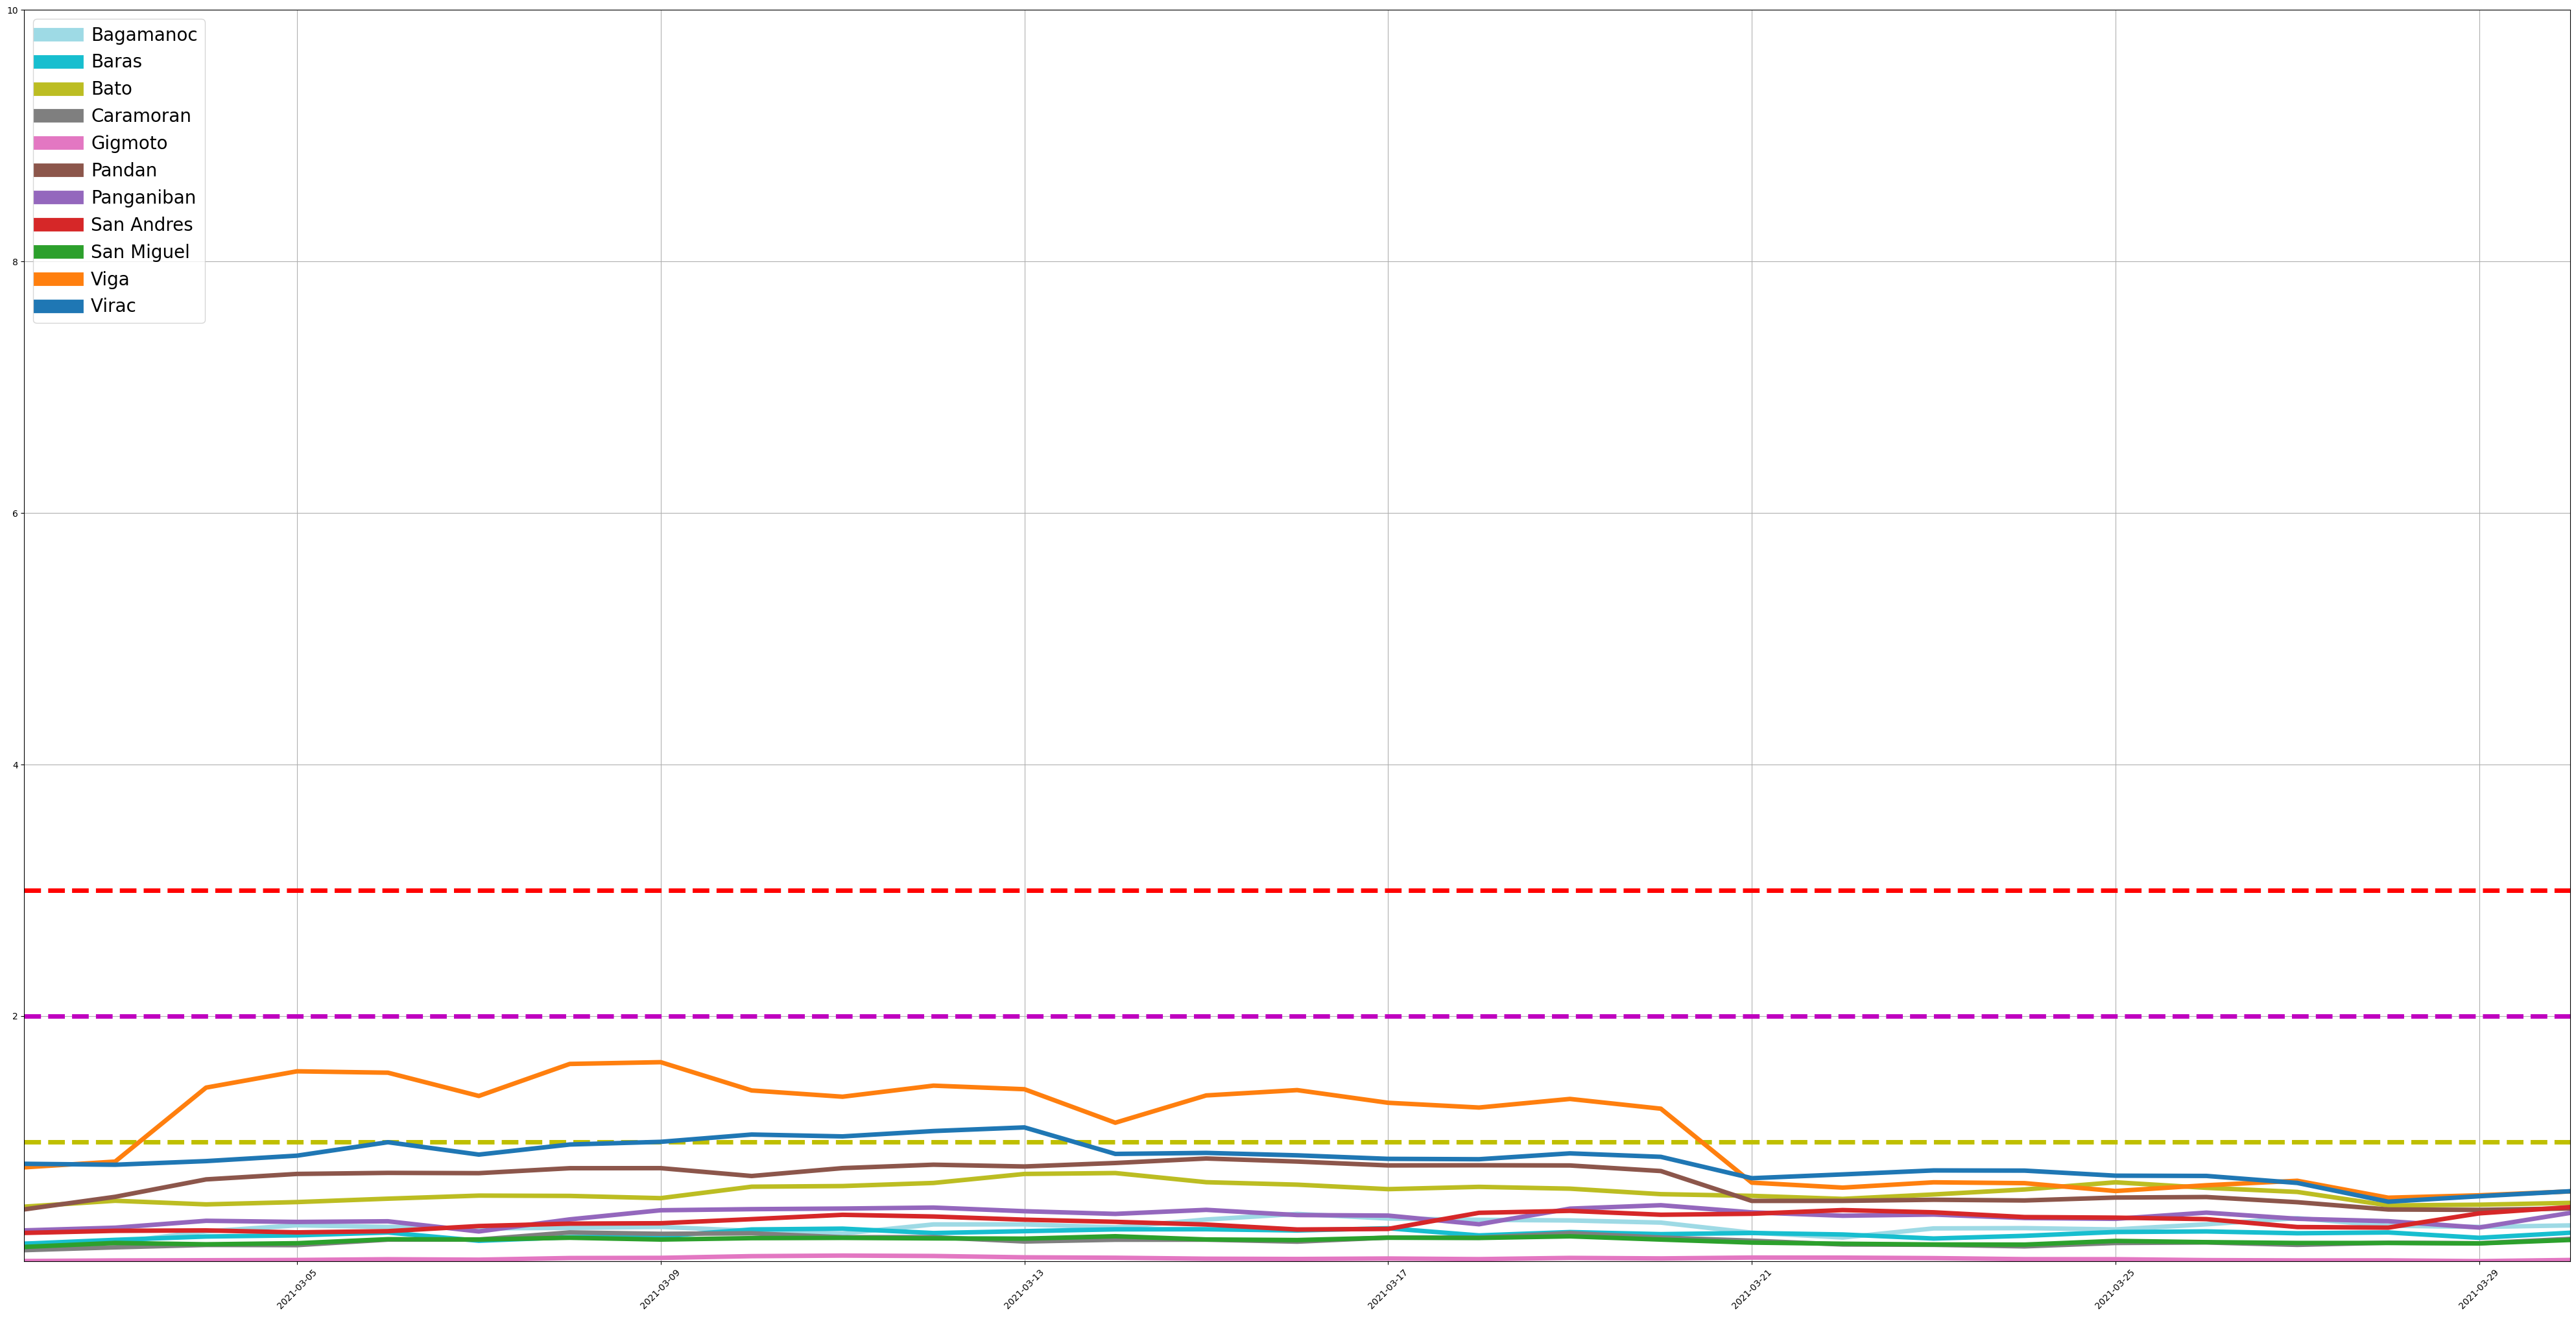

In [7]:
plot_rr_line_graph('typeII', '2021-03-01', '2021-03-31')

C:\Users\diana\AppData\Local\Temp\ipykernel_25404\1315259307.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


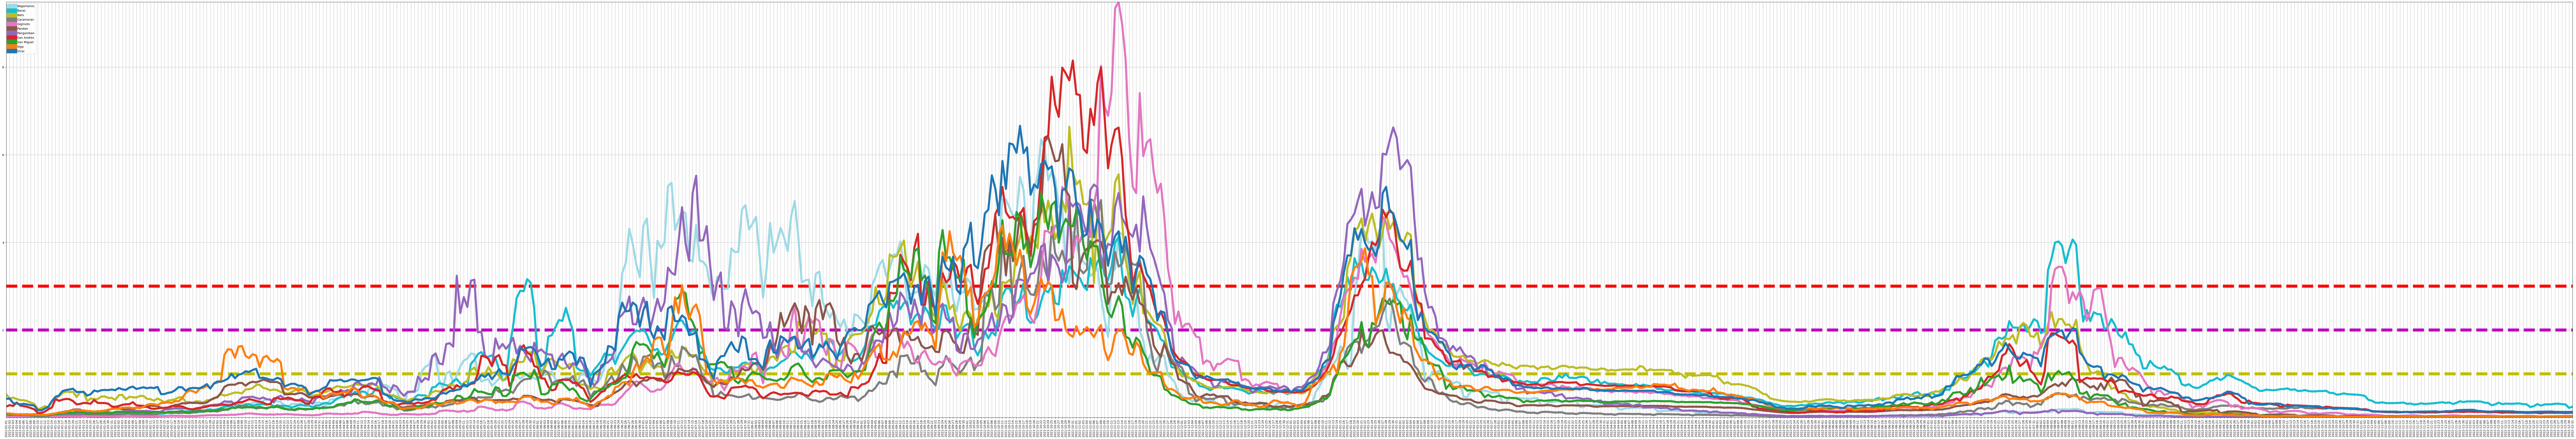

In [21]:
plot_rr_line_graph('typeII')

## Create Choropleth Animation

<Axes: >

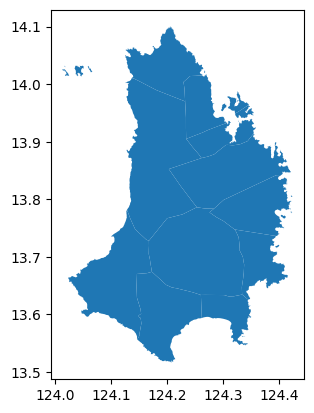

In [6]:
sf = gpd.read_file(f"../01_data/01_processed/02_filtered_shapefiles/{province}/{province}.shp")
sf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
sf.plot()

In [7]:
sf.head(10)

,adm1_psgc,adm2_psgc,adm3_psgc,adm3_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,500000000,502000000,502001000,Bagamanoc,Mun,69510,68263960,69,68.0,"MULTIPOLYGON (((124.26683 14.02121, 124.26778 ..."
1,500000000,502000000,502002000,Baras,Mun,73441,71126568,73,71.0,"MULTIPOLYGON (((124.39639 13.73633, 124.39639 ..."
2,500000000,502000000,502003000,Bato,Mun,57344,51954499,57,51.0,"MULTIPOLYGON (((124.34623 13.62613, 124.34621 ..."
3,500000000,502000000,502004000,Caramoran,Mun,120928,281463181,120,281.0,"MULTIPOLYGON (((124.0474 14.01378, 124.04737 1..."
4,500000000,502000000,502005000,Gigmoto,Mun,80885,106033936,80,106.0,"MULTIPOLYGON (((124.39639 13.73633, 124.39363 ..."
5,500000000,502000000,502006000,Pandan,Mun,72753,106047281,72,106.0,"MULTIPOLYGON (((124.26327 14.01531, 124.25632 ..."
6,500000000,502000000,502007000,Panganiban,Mun,74678,50585420,74,50.0,"MULTIPOLYGON (((124.34591 13.96378, 124.34591 ..."
7,500000000,502000000,502008000,San Andres,Mun,85557,179142572,85,179.0,"POLYGON ((124.16783 13.72802, 124.16796 13.719..."
8,500000000,502000000,502009000,San Miguel,Mun,59751,242829264,59,242.0,"POLYGON ((124.28404 13.78363, 124.27618 13.777..."
9,500000000,502000000,502010000,Viga,Mun,90041,168222453,90,168.0,"MULTIPOLYGON (((124.4041 13.84219, 124.39841 1..."


KeyboardInterrupt: 

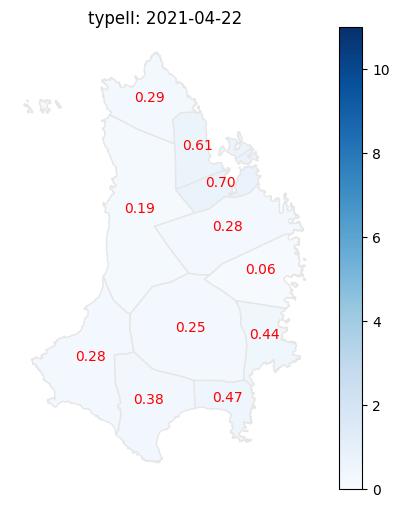

In [ ]:
def plot_choropleth(model_type):
    # get list of municiaplities
    labels = sf['adm3_psgc'].unique().tolist()

    # get list of dates
    date_values = results['Date'].unique().tolist()

    # set subplots for animation
    fig, ax = plt.subplots(1, figsize=(5,6))

    # function to update frames
    def update(frame):
        plt.clf()
        ax = plt.subplot(1, 1, 1)

        # current date
        date_value = date_values[frame]

        # dataframe of results for current date
        filtered_dataframe = results[results['Date'] == date_value]

        # rr values per municiaplity
        values = []

        # for each municipality in province
        for label in labels:
            # append rr results to values[]
            values.append(results[(results['Date'] == date_value) & (results['PSGC'] == label)][model_type].values[0])

        # merge results with shapefile
        df_merged = sf.merge(filtered_dataframe,left_on=['adm3_psgc'], right_on=['PSGC'])
        
        # plot shapefile with results
        df_merged.plot(column=model_type, cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', vmin=0, vmax=11, legend=True)
        plt.title(f'{model_type}: {date_value}')

        # for each municipality polygon
        for _, (geometry, val) in enumerate(zip(sf.geometry, values)):
            centroid = geometry.centroid
            ax.text(centroid.x, centroid.y, "{:.2f}".format(val), fontsize=10, ha='center', color='red')

        # turn off axiz
        ax.axis('off')

    # animate resutls
    anim = animation.FuncAnimation(fig, update,frames=len(date_values), interval=100, repeat=False)

    # save as mp4 file
    anim.save(f'00_output/{province}/{province}_choropleth_animation_{model_type}.mp4', writer='ffmpeg')

    # close figure
    plt.close(fig)


In [14]:
plot_choropleth('typeII')